In [1]:
#filename = '500-gpt-4o-mini-text-embedding-3-large'
filename = '500-microsoft-phi-4-text-embedding-3-large'
#filename = '500-meta-llama-Llama-3.3-70B-Instruct-text-embedding-3-large'
#filename = '1000-microsoft-phi-4-text-embedding-3-large'
#filename = '2000-microsoft-phi-4-text-embedding-3-large'
experiment = '-p3'
GROLTS_LABELS = True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np

pd.set_option('future.no_silent_downcasting', True)

path = './data_out/'

# Single Eval

798
798
Summed Acc:  15.815789473684207


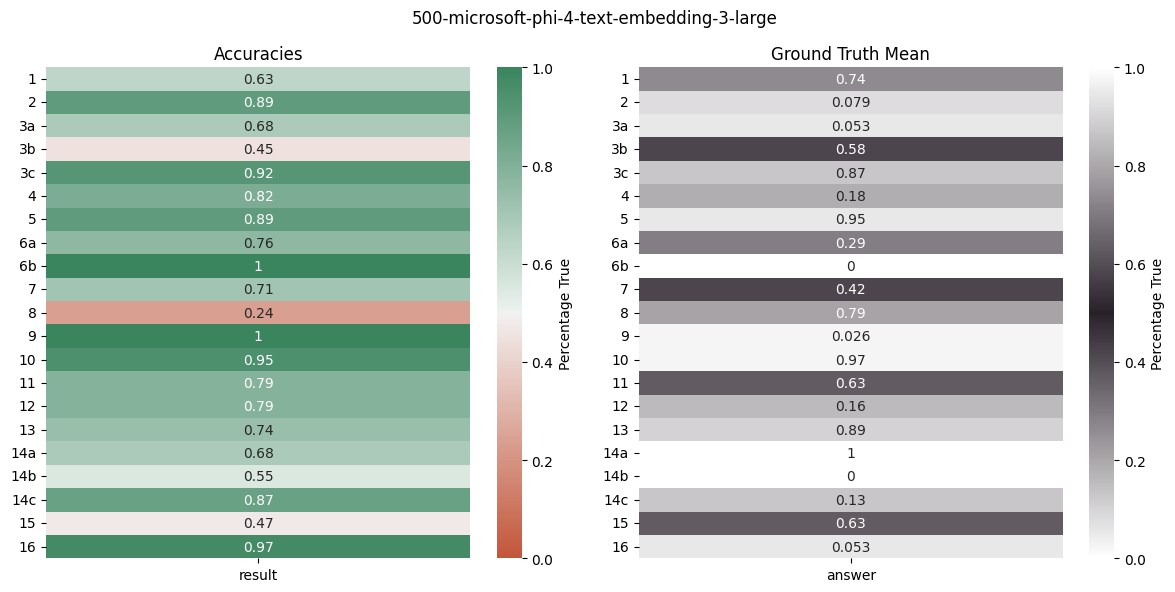

In [3]:
# Read the data
df = pd.read_csv(path + filename + experiment + '.csv')
df_labels = pd.read_csv('./data_out/human_labels.csv', delimiter=';', dtype=int)
df_labels = df_labels.melt(id_vars=['paper_id'], var_name='question_id', value_name='answer')
df_labels['paper_id'] = df_labels['paper_id'].astype(int)
df_labels['question_id'] = df_labels['question_id'].astype(int)
df_labels['answer'] = df_labels['answer'].astype(int)

# Replace 'YES'/'NO' answers with 1/0 in both DataFrames
df.replace(('YES', 'Yes', 'yes', 'NO', 'No', 'no'), (1, 1, 1, 0, 0, 0), inplace=True)

# Merge the prediction and label DataFrames on 'paper_id' and 'question_id'
df_merged = df.merge(df_labels, on=['paper_id', 'question_id'], suffixes=('_pred', '_true'))

# Add a 'result' column indicating whether the prediction matches the true label
df_merged['result'] = np.where(
    df_merged['answer_pred'].isin([0, 1]),
    df_merged['answer_pred'] == df_merged['answer_true'],
    np.nan
)
print(len(df_merged))
df_merged.dropna(inplace=True)
print(len(df_merged))

# Group by 'question_id' to calculate the mean accuracy per question
percent_true_by_question = df_merged.groupby('question_id')['result'].mean().reset_index()

# Print the summed accuracy
print('Summed Acc: ', percent_true_by_question['result'].sum())

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap for predicted results
g = sns.heatmap(
    percent_true_by_question.set_index('question_id'),
    annot=True,
    cmap=sns.diverging_palette(20, 145, as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1, ax=ax1
)
g.set_title('Accuracies')
g.set_xlabel('')
g.set_ylabel('')
if GROLTS_LABELS:
    g.set_yticklabels(['1', '2', '3a', '3b', '3c', '4', '5', '6a', '6b', '7', '8', '9', '10', '11', '12', '13', '14a', '14b', '14c', '15', '16']) 
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

percent_true_by_question_lab = df_labels.groupby('question_id')['answer'].mean().reset_index()
percent_true_by_question_lab = percent_true_by_question_lab.reindex(percent_true_by_question.index)

# Heatmap for ground truth results
g = sns.heatmap(
    percent_true_by_question_lab.set_index('question_id'),
    annot=True,
    cmap=sns.diverging_palette(0, 0, l=100, center="dark", as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1, ax=ax2
)
g.set_title('Ground Truth Mean')
g.set_xlabel('')
g.set_ylabel('')
if GROLTS_LABELS:
    g.set_yticklabels(['1', '2', '3a', '3b', '3c', '4', '5', '6a', '6b', '7', '8', '9', '10', '11', '12', '13', '14a', '14b', '14c', '15', '16']) 
ax2.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Final plot adjustments
fig.suptitle(filename)
fig.tight_layout()
plt.show()

# Prompt Comparison

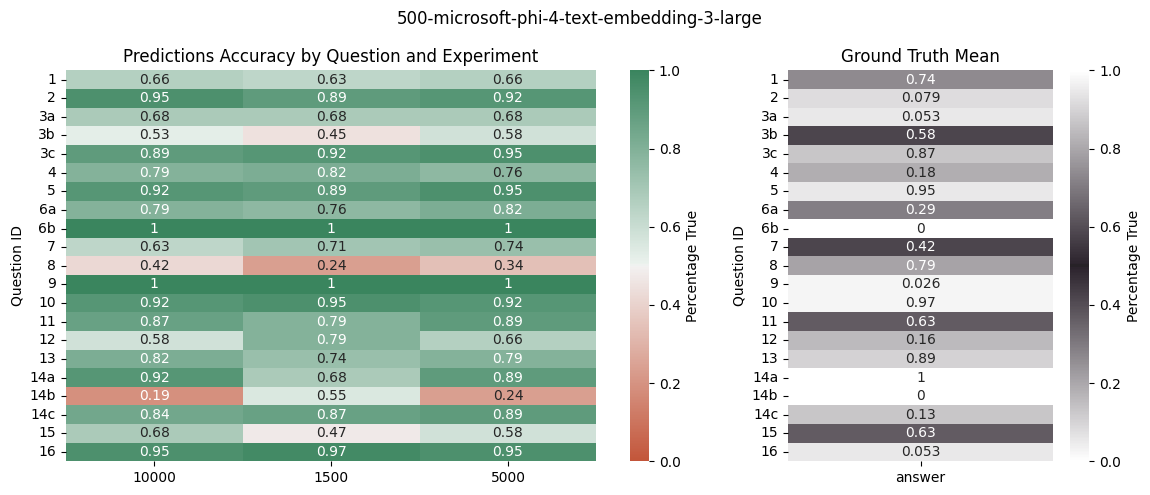

In [7]:
df1 = pd.read_csv('data_out/500-microsoft-phi-4-text-embedding-3-large-p3.csv')
df1['experiment'] = '1500'
df2 = pd.read_csv('data_out/1000-microsoft-phi-4-text-embedding-3-large-p3.csv')
df2['experiment'] = '5000'
df3 = pd.read_csv('data_out/2000-microsoft-phi-4-text-embedding-3-large-p3.csv')
df3['experiment'] = '10000'

# Combine the data
df = pd.concat([df1, df2, df3])

# Replace categorical 'YES'/'NO' with numeric 1/0
df.replace(('YES', 'Yes', 'yes', 'NO', 'No', 'no'), (1, 1, 1, 0, 0, 0), inplace=True)

# Load human labels
df_labels = pd.read_csv('./data_out/human_labels.csv', delimiter=';', dtype=int)
df_labels = df_labels.melt(id_vars=['paper_id'], var_name='question_id', value_name='answer')
df_labels['paper_id'] = df_labels['paper_id'].astype(int)
df_labels['question_id'] = df_labels['question_id'].astype(int)
df_labels['answer'] = df_labels['answer'].astype(int)

# Merge predictions with true labels
df_merged = df.merge(df_labels, on=['paper_id', 'question_id'], suffixes=('_pred', '_true'))

# Add a 'result' column indicating whether the prediction matches the true label
df_merged['result'] = np.where(
    df_merged['answer_pred'].isin([0, 1]),
    df_merged['answer_pred'] == df_merged['answer_true'],
    np.nan
)
df_merged.dropna(inplace=True)

# Calculate accuracy by question and experiment
accuracy_by_question_exp = df_merged.groupby(['question_id', 'experiment'])['result'].mean().reset_index()

# Plotting section
fig = plt.figure(figsize=(11.69, 5))
gs = GridSpec(1, 2, width_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Heatmap for predictions accuracy by question and experiment
pivot_accuracy = accuracy_by_question_exp.pivot(index='question_id', columns='experiment', values='result')
g = sns.heatmap(
    pivot_accuracy,
    annot=True,
    cmap=sns.diverging_palette(20, 145, as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1,
    ax=ax1
)
ax1.set_title('Predictions Accuracy by Question and Experiment')
ax1.set_xlabel('')
ax1.set_ylabel('Question ID')
if GROLTS_LABELS:
    g.set_yticklabels(['1', '2', '3a', '3b', '3c', '4', '5', '6a', '6b', '7', '8', '9', '10', '11', '12', '13', '14a', '14b', '14c', '15', '16']) 
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# Prepare the true labels data for comparison
percent_true_by_question_lab = df_labels.groupby('question_id')['answer'].mean().reset_index()

# Heatmap for ground truth mean accuracy by question
g = sns.heatmap(
    percent_true_by_question_lab.set_index('question_id'),
    annot=True,
    cmap=sns.diverging_palette(0, 0, l=100, center="dark", as_cmap=True),
    cbar_kws={'label': 'Percentage True'},
    vmin=0, vmax=1,
    ax=ax2
)
ax2.set_title('Ground Truth Mean')
ax2.set_xlabel('')
ax2.set_ylabel('Question ID')
if GROLTS_LABELS:
    g.set_yticklabels(['1', '2', '3a', '3b', '3c', '4', '5', '6a', '6b', '7', '8', '9', '10', '11', '12', '13', '14a', '14b', '14c', '15', '16']) 
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

# Final title and layout adjustment
fig.suptitle(filename)
fig.tight_layout()
plt.savefig('../viz/' + filename + '.pdf', bbox_inches='tight')
plt.show()
